Import necessary libraries for data manipulation, visualization, and modeling

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

## Data Loading and Preparation

In [4]:
#Load the dataset from a CSV file
#The dataset contains two columns: 'YearsExperience' and 'Salary'
dataset = pd.read_csv("years-of-experience-and-salary-dataset/Salary_Data.csv")

In [44]:
# Extract the features (X) and the target variable (Y)
# Reshape the arrays to be compatible with scikit-learn's model fitting
X = np.array(dataset["YearsExperience"]).reshape(-1,1)
Y = np.array(dataset["Salary"]).reshape(-1,1)

## Data Visualization

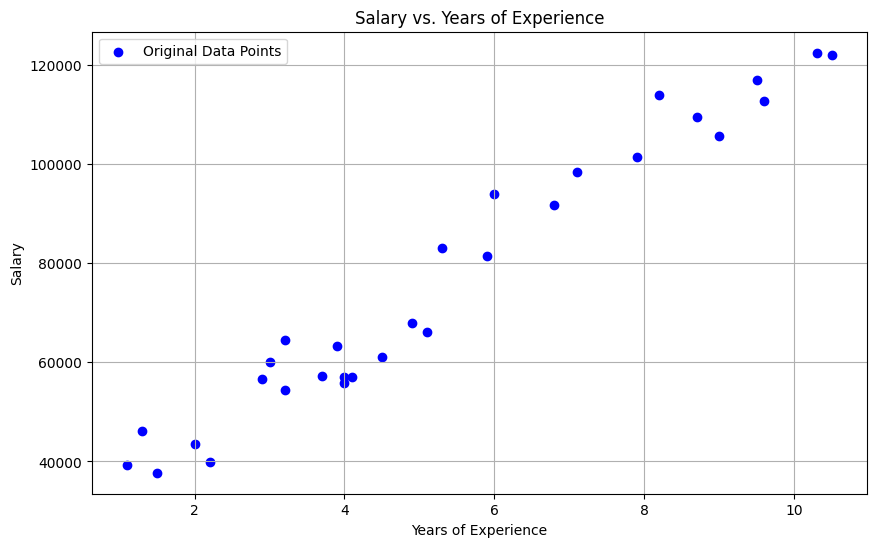

In [45]:
# Visualize the relationship between Years of Experience and Salary
# This helps us see the linear trend in the data
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue", label="Original Data Points")
plt.title("Salary vs. Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()

## 3. Linear Regression with Scikit-learn

In [47]:
# Split the data into training and testing sets
# The test set will be 20% of the total data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [48]:
# Create an instance of the Linear Regression model
model = LinearRegression()

In [49]:
# Fit the model to the training data
# The model learns the optimal coefficients (m) and intercept (b)
model.fit(X,Y)

LinearRegression()

In [50]:
# Make predictions on the test set
Y_pred = model.predict(X_test)

In [53]:
# Evaluate the model's performance
# R-squared (R2) measures how well the model's predictions match the real data
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Scikit-learn Model Performance")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Scikit-learn Model Performance
R-squared Score: 0.9091
Mean Squared Error: 46452879.7548


In [56]:
# Get the coefficients from the scikit-learn model
m = model.coef_
b = model.intercept_
print(f"Coefficients: m = {m.item():.4f}, b = {b.item():.4f}")

Coefficients: m = 9449.9623, b = 25792.2002


## 4. Linear Regression from Scratch using Gradient Descent

In [57]:
print("\n--- Training model with Gradient Descent ---")


--- Training model with Gradient Descent ---


Epoch 0: m=9449.9623, b=25792.2002, Loss=31270951.7223
Epoch 100: m=9449.9623, b=25792.2002, Loss=31270951.7223
Epoch 200: m=9449.9623, b=25792.2002, Loss=31270951.7223
Epoch 300: m=9449.9623, b=25792.2002, Loss=31270951.7223
Epoch 400: m=9449.9623, b=25792.2002, Loss=31270951.7223
Epoch 500: m=9449.9623, b=25792.2002, Loss=31270951.7223
Epoch 600: m=9449.9623, b=25792.2002, Loss=31270951.7223
Epoch 700: m=9449.9623, b=25792.2002, Loss=31270951.7223
Epoch 800: m=9449.9623, b=25792.2002, Loss=31270951.7223
Epoch 900: m=9449.9623, b=25792.2002, Loss=31270951.7223

Optimized parameters: m = 9449.9623, b = 25792.2002
Final loss :  {31270951.722280968}


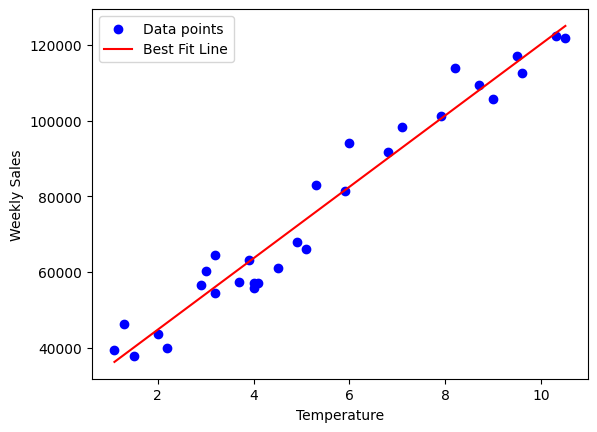

In [42]:
learning_rate = 0.001
epochs = 1000  # number of iterations

# Loss function (Mean Squared Error)
def compute_loss(X, Y, m, b):
    n = len(X)
    predictions = m * X + b
    return np.mean((Y - predictions) ** 2)

# Gradient Descent
for i in range(epochs):
    n = len(X)
    predictions = m * X + b
    
    # Gradients
    dm = (-2/n) * np.sum(X * (Y - predictions))
    db = (-2/n) * np.sum(Y - predictions)
    
    # Update parameters
    m = m - learning_rate * dm
    b = b - learning_rate * db
    
    # Print loss every 100 iterations
    if i % 100 == 0:
        loss = compute_loss(X, Y, m, b)
        print(f"Epoch {i}: m={m.item():.4f}, b={b.item():.4f}, Loss={loss:.4f}")

# Final results
print(f"\nOptimized parameters: m = {m.item():.4f}, b = {b.item():.4f}")
print("Final loss : ", {compute_loss(X, Y, m, b)})

# Plot the data and the fitted line
plt.scatter(X, Y, color="blue", label="Data points")
plt.plot(X, m * X + b, color="red", label="Best Fit Line")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [58]:
# Initialize parameters for Gradient Descent
m_gd = 0.0  # Initial slope
b_gd = 0.0  # Initial intercept
learning_rate = 0.001
epochs = 1000  # number of iterations

In [59]:
# Loss function (Mean Squared Error)
def compute_loss(X, Y, m, b):
    n = len(X)
    predictions = m * X + b
    return np.mean((Y - predictions) ** 2)

In [60]:
# Gradient Descent loop
for i in range(epochs):
    n = len(X_train)
    
    # Calculate predictions
    predictions = m_gd * X_train + b_gd
    
    # Calculate gradients of the loss function with respect to m and b
    dm = (-2/n) * np.sum(X_train * (Y_train - predictions))
    db = (-2/n) * np.sum(Y_train - predictions)
    
    # Update parameters using the gradients and learning rate
    m_gd = m_gd - learning_rate * dm
    b_gd = b_gd - learning_rate * db
    
    # Print the loss every 100 iterations to monitor progress
    if i % 100 == 0:
        loss = compute_loss(X_train, Y_train, m_gd, b_gd)
        print(f"  Epoch {i}: m={m_gd:.4f}, b={b_gd:.4f}, Loss={loss:.4f}")

  Epoch 0: m=926.3601, b=148.4153, Loss=5422574528.4867
  Epoch 100: m=12730.3888, b=2977.4857, Loss=144810711.0998
  Epoch 200: m=12587.7703, b=3986.2595, Loss=134430377.3957
  Epoch 300: m=12445.0672, b=4948.5672, Loss=124966879.6809
  Epoch 400: m=12308.7968, b=5867.4704, Loss=116337811.7749
  Epoch 500: m=12178.6728, b=6744.9275, Loss=108469599.0723
  Epoch 600: m=12054.4179, b=7582.8078, Loss=101295154.2994
  Epoch 700: m=11935.7674, b=8382.8964, Loss=94753305.5029
  Epoch 800: m=11822.4684, b=9146.8979, Loss=88788274.4752
  Epoch 900: m=11714.2797, b=9876.4399, Loss=83349201.1692


In [62]:
# Final results from Gradient Descent
final_loss_gd = compute_loss(X_train, Y_train, m_gd, b_gd)
print(f"Optimized parameters from Gradient Descent:")
print(f"m = {m_gd:.4f}, b = {b_gd:.4f}")
print(f"Final Loss: {final_loss_gd:.4f}")

Optimized parameters from Gradient Descent:
m = 11611.9804, b = 10566.2682
Final Loss: 78437073.0794


## 5. Final Visualization: Comparing Models

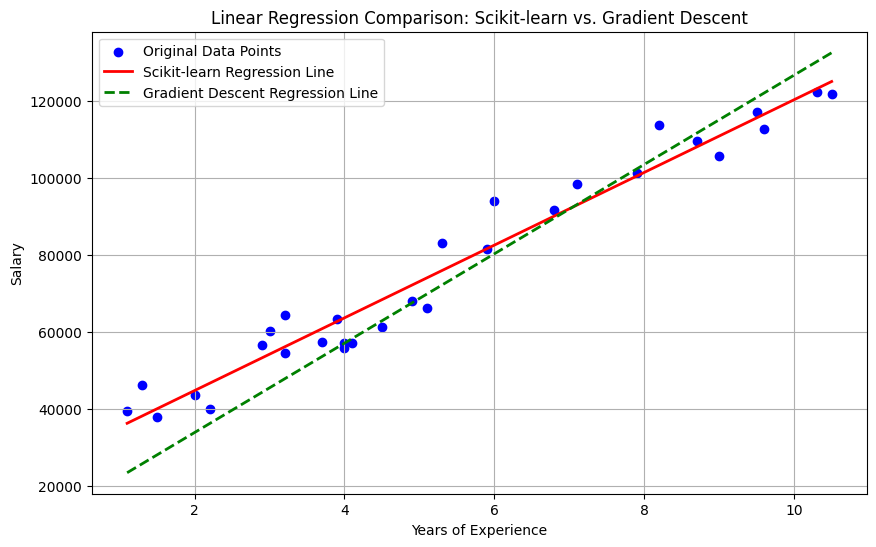

In [65]:
# Plot the original data and the fitted lines from both models
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue", label="Original Data Points")
plt.plot(X, m * X + b, color="red", linestyle='-', linewidth=2, label="Scikit-learn Regression Line")
plt.plot(X, m_gd * X + b_gd, color="green", linestyle='--', linewidth=2, label="Gradient Descent Regression Line")
plt.title("Linear Regression Comparison: Scikit-learn vs. Gradient Descent")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()